In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, r2_score
import pickle as pkl
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('data/processed_data.csv')

In [3]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,income_to_loan,net_disposable_income
0,-1.381088,0,3,-1.817263,0,2,-1.523319,1,0.082231,0.08,-1.099317,-2.693926,1,0,0.073910,-1.801351
1,-1.381088,0,3,-1.796097,0,2,-1.214711,5,-1.284692,0.19,-1.099317,-2.106390,0,1,-0.614483,-1.782202
2,-1.381088,0,3,-1.802805,0,2,-1.399875,5,1.312461,0.13,-0.747643,0.159820,0,1,-0.344861,-1.790771
3,-1.381088,0,0,-1.790972,0,2,-0.803233,2,-0.775513,0.34,-1.099317,0.390638,0,1,-0.834176,-1.783725
4,-0.633256,0,4,-1.753956,1,0,-1.369015,1,0.030971,0.12,-1.099317,0.978174,0,1,-0.325489,-1.740267


In [4]:
X = df[['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file', 'income_to_loan', 'net_disposable_income']]
y = df['loan_status']

In [5]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
df['loan_status'].value_counts()

loan_status
0    29360
1     7859
Name: count, dtype: int64

In [9]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [10]:
y_train.value_counts()

loan_status
0    23488
1    23488
Name: count, dtype: int64

In [11]:
# train random forest model
random_forest = RandomForestClassifier(random_state=42, class_weight='balanced')
random_forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [12]:
# prediction
y_pred = random_forest.predict(X_test)

In [14]:
# accuracy and cross valudation of random forest
accuracy = accuracy_score(y_test, y_pred)
cross_val = cross_val_score(random_forest, X, y, cv=5)

accuracy, np.mean(cross_val)

(0.9063675443310049, 0.9223249517396154)

## Model Evaluation

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

In [16]:
# claddification report of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      5872
           1       0.75      0.84      0.79      1572

    accuracy                           0.91      7444
   macro avg       0.85      0.88      0.87      7444
weighted avg       0.91      0.91      0.91      7444



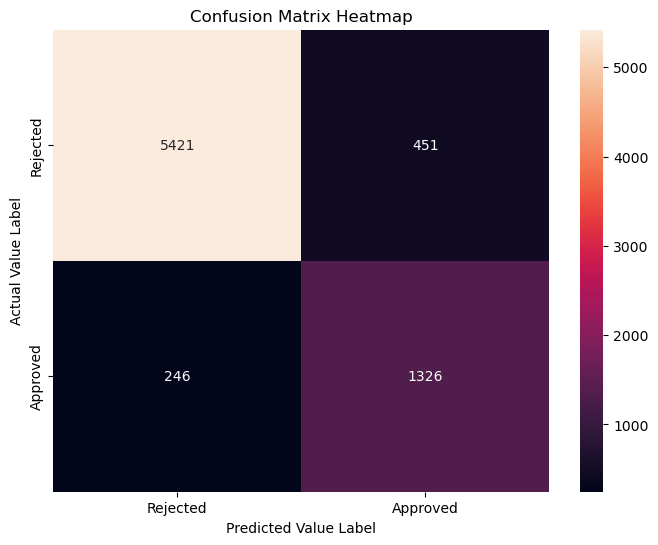

In [17]:
# heatmap with confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.xlabel('Predicted Value Label')
plt.ylabel('Actual Value Label')
plt.title('Confusion Matrix Heatmap')
# plt.savefig('charts/confusion_matrix.png')
plt.show()

In [18]:
# save the model to local directory
pkl.dump(random_forest, open('random_forest.pkl', 'wb'))